In [1]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt

In [2]:
fname = 'data/MYD05_L2.A2020060.1635.061.2020061153519.hdf'
modis = starepandas.read_mod09(fname, 
                               add_stare=True,
                               adapt_resolution=True,
                               track_first=False)

In [3]:
trixels = modis.trixels()
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)
modis.set_trixels(trixels=trixels, inplace=True)

<AxesSubplot:>

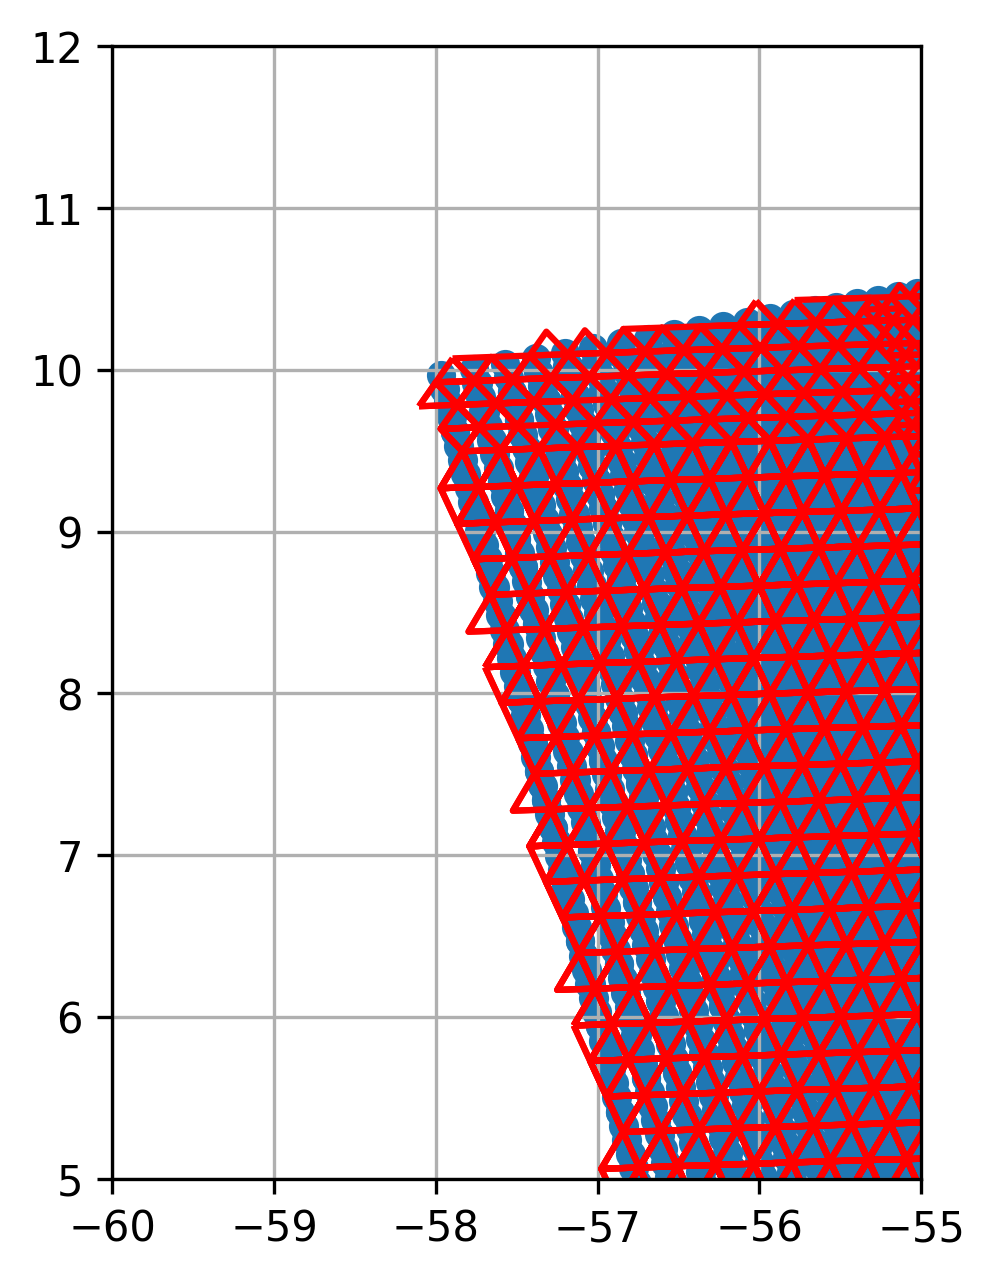

In [8]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

ax.set_xlim(-60,-55)
ax.set_ylim(5,12)
modis.plot(trixels=False, ax=ax)
modis.plot(trixels=True, color='r', ax=ax)

# Manually getting the 2D STARE array

In [49]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [50]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [51]:
start = datetime.datetime.now()
sids = pystare.from_latlon2D(lat=lat, lon=lon, adapt_resolution=True)
datetime.datetime.now()-start

datetime.timedelta(microseconds=910970)

In [52]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


# Intersecting Data 

In [53]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
stare = starepandas.stare_from_gdf(world, level=7, force_ccw=True)
world = starepandas.STAREDataFrame(world, stare=stare)
trixels = world.trixels()
world.set_trixels(trixels, inplace=True)

<AxesSubplot:>

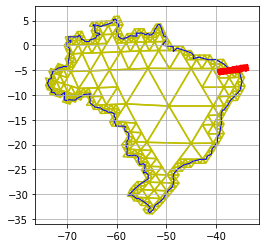

In [34]:
fig, ax = plt.subplots()
ax.grid(True)

brazil = world[world.name=='Brazil']
brazil.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
brazil.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis.plot(ax=ax, color='red', trixels=True)

In [37]:
a = modis.stare_intersects(brazil.stare.iloc[0])
a.any()

True

In [44]:
len(brazil.stare.iloc[0])

565